### Time series

A time series is a sequence of observations over a certain period. 
A univariate time series consists of the values taken by a single variable at periodic time instances over a period.
A multivariate time series consists of the values taken by multiple variables at the same periodic time instances over a period

#### Neural Networks
An artificial neural network is a layered structure of connected neurons, inspired by biological neural networks.

#### Recurrent Neural Networks
The neurons of RNN have a cell state/memory, and input is processed according to this internal state, which is achieved with the help of loops with in the neural network. There are recurring module(s) of ‘tanh’ layers in RNNs that allow them to retain information. However, not for a long time, which is why we need LSTM models.

#### LSTM
It is special kind of recurrent neural network that is capable of learning long term dependencies in data. This is achieved because the recurring module of the model has a combination of four layers interacting with each other.

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.0.0-rc0


In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Dense, LSTM, Dropout

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [ ]:
data = pd.read_csv('/content/GOOG.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3891,2020-02-04,1457.069946,1469.500000,1426.300049,1447.069946,1447.069946,3933000
3892,2020-02-05,1462.420044,1463.839966,1430.560059,1448.229980,1448.229980,1986200
3893,2020-02-06,1450.329956,1482.000000,1449.569946,1476.229980,1476.229980,1679400
3894,2020-02-07,1467.300049,1485.839966,1466.349976,1479.229980,1479.229980,1171300
3895,2020-02-10,1474.319946,1500.819946,1474.319946,1499.810059,1499.810059,882038


In [ ]:

data_training = data[data['Date']<'2019-01-01'].copy()
data_test = data[data['Date']>='2019-01-01'].copy()

In [ ]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [ ]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01,
        2.54672037e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01,
        1.70463908e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12332341e-01, 8.09012935e-01,
        1.79975186e-02]])

create RNN with 60 timesteps, i.e. look 60 previous time steps

In [ ]:
data_training[0:10]

array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       [4.91367646e-03, 4.01532941e-03, 3.15578542e-03, 1.98678849e-03,
        1.85522018e-01],
       [2.35285614e-03, 2.54928676e-03, 3.28434064e-03, 2.44873974e-03,
        1.11762967e-01],
       [2.34877785e-03, 2.52892558e-03, 3.60779701e-03, 3.22955376e-03,
        8.62763771e-02],
       [3.63326671e-03, 2.80177162e-03, 4.03492722e-03, 2.51005881e-03,
        7.55243925e-02],
       [2.48334262e-03, 1.52712947e-03, 2.50886935e-03, 8.17608079e-04,
        6.31682127e-02],
       [1.26817570e-03, 8.02253103e-04, 2.57107531e-03, 9.64778600e-04,
        5.97732318e-02],
       [1.43128522e-03, 5.00900100e-04, 1.53849690e-03, 9.81131336e-05,
        1.11151095e-01]])

In [ ]:

X_train = []
y_train = []



for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(3557, 60, 5)

In [ ]:
y_train

array([0.03508488, 0.03313572, 0.03193279, ..., 0.79219711, 0.81877719,
       0.8198741 ])

Building LSTM

In [ ]:
regressior = Sequential()

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 120, activation = 'relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units = 1))

In [ ]:
(X_train.shape[1], 5)

(60, 5)

In [ ]:
regressior.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 60, 60)            15840     
_________________________________________________________________
dropout_16 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 60, 60)            29040     
_________________________________________________________________
dropout_17 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_18 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 120)              

In [ ]:
regressior.compile(optimizer='adam', loss = 'mean_squared_error')

In [ ]:
regressior.fit(X_train, y_train, epochs=50, batch_size=32)

Train on 3557 samples
Epoch 1/50
3557/3557 [==============================] - 30s 8ms/sample - loss: 0.0116
Epoch 2/50
3557/3557 [==============================] - 26s 7ms/sample - loss: 0.0018
Epoch 3/50
3557/3557 [==============================] - 26s 7ms/sample - loss: 0.0017
Epoch 4/50
3557/3557 [==============================] - 26s 7ms/sample - loss: 0.0021
Epoch 5/50
3557/3557 [==============================] - 26s 7ms/sample - loss: 0.0017
Epoch 6/50
3557/3557 [==============================] - 26s 7ms/sample - loss: 0.0015
Epoch 7/50
3557/3557 [==============================] - 26s 7ms/sample - loss: 0.0014
Epoch 8/50
3557/3557 [==============================] - 26s 7ms/sample - loss: 0.0012
Epoch 9/50
3557/3557 [==============================] - 26s 7ms/sample - loss: 0.0012
Epoch 10/50
3557/3557 [==============================] - 25s 7ms/sample - loss: 0.0013
Epoch 11/50
3557/3557 [==============================] - 26s 7ms/sample - loss: 0.0012
Epoch 12/50
3557/3557 [=======

Prepare The Dataset

In [ ]:
data_test.shape

(279, 7)

In [ ]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [ ]:
data_train = data[data['Date']<'2019-01-01'].copy()

In [ ]:
data_train.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
3557,2018-10-04,1195.329956,1197.510010,1155.576050,1168.189941,1168.189941,2209500
3558,2018-10-05,1167.500000,1173.500000,1145.119995,1157.349976,1157.349976,1184300
3559,2018-10-08,1150.109985,1168.000000,1127.364014,1148.969971,1148.969971,1932400
3560,2018-10-09,1146.150024,1154.349976,1137.572021,1138.819946,1138.819946,1308700
3561,2018-10-10,1131.079956,1132.170044,1081.130005,1081.219971,1081.219971,2675700
3562,2018-10-11,1072.939941,1106.400024,1068.270020,1079.319946,1079.319946,2949000
3563,2018-10-12,1108.000000,1115.000000,1086.401978,1110.079956,1110.079956,2101300
3564,2018-10-15,1108.910034,1113.446045,1089.000000,1092.250000,1092.250000,1372400
3565,2018-10-16,1104.589966,1124.219971,1102.500000,1121.280029,1121.280029,1928500
3566,2018-10-17,1126.459961,1128.989990,1102.189941,1115.689941,1115.689941,1467200


In [ ]:
past_60_days = data_train.tail(60)

In [ ]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700


In [ ]:
inputs = scaler.transform(df)
inputs

array([[0.93805611, 0.93755773, 0.92220906, 0.91781776, 0.0266752 ],
       [0.91527437, 0.91792904, 0.91350452, 0.90892169, 0.01425359],
       [0.90103881, 0.91343268, 0.89872289, 0.90204445, 0.02331778],
       ...,
       [1.14680042, 1.17013431, 1.16695531, 1.170618  , 0.02025236],
       [1.16069223, 1.17327356, 1.18092448, 1.17308002, 0.01409608],
       [1.16643875, 1.18552001, 1.18755938, 1.18996954, 0.0105913 ]])

In [ ]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])


In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape


((279, 60, 5), (279,))

In [ ]:
y_pred = regressior.predict(X_test)

In [ ]:
scaler.scale_

array([8.18605127e-04, 8.17521128e-04, 8.32487534e-04, 8.20673293e-04,
       1.21162775e-08])

In [ ]:
scale = 1/8.16599709e-04
scale

1224.5901988191868

In [ ]:
y_pred1 = y_pred*scale
y_test1 = y_test*scale

Visulization

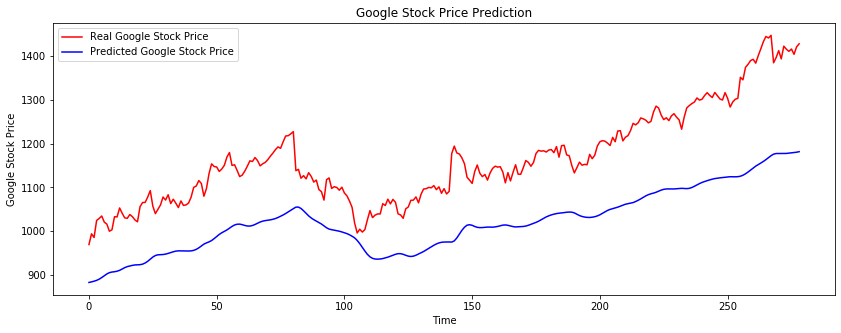

In [ ]:

# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test1, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred1, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()